<a href="https://colab.research.google.com/github/abirhazra/Reinforcement-Learning/blob/main/Deep_Reinforcement_Learning(gym_environment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reference: Nicholas Renotte

#Steps for Deep Reinforcement Learning
1) Creating environments from OpenAi 

2) Building a tf.keras DL model

3) Using keras-rl agents to train

In [ ]:
!pip install gym
!pip install keras
!pip install keras-rl2
!pip install tensorflow==2.3.0

     |████████████████████████████████| 61kB 3.8MB/s 


#Cartpole Reinforcement Learning
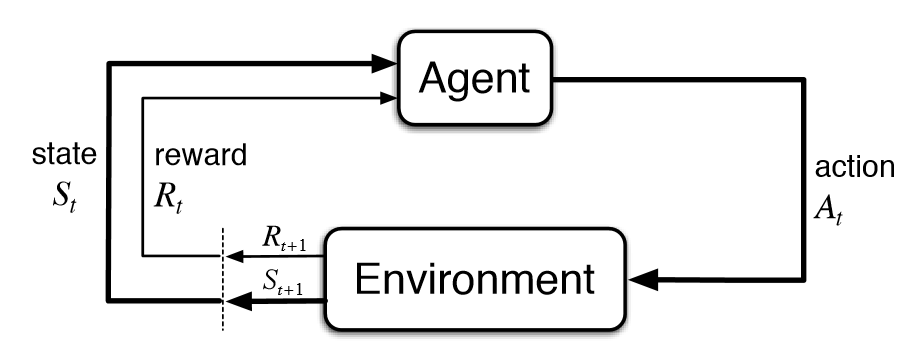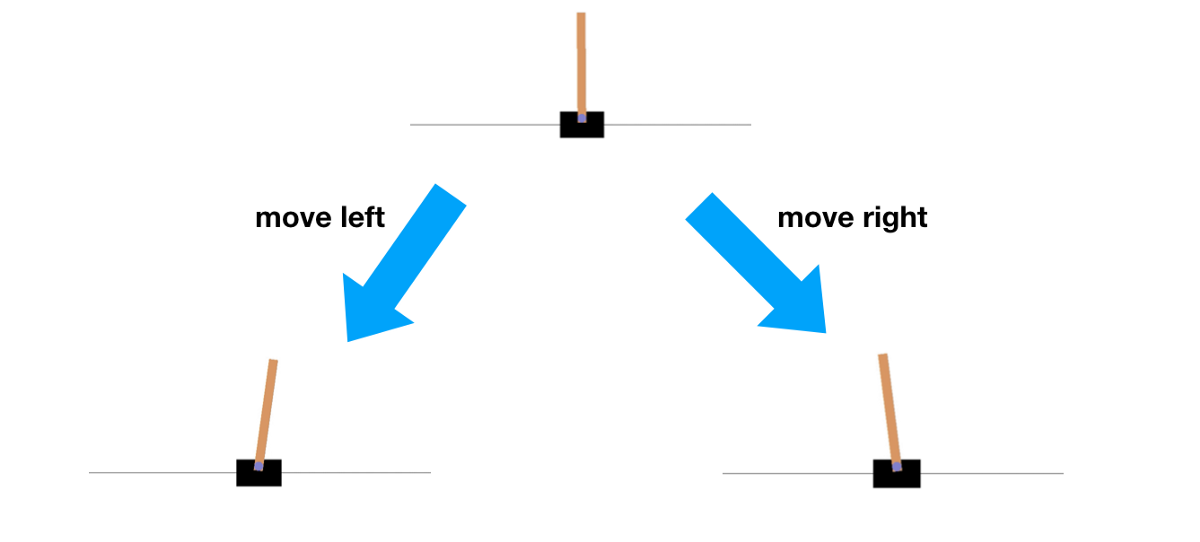

In [32]:
import gym
import random

In [33]:
env = gym.make('CartPole-v0')
states = env.observation_space.shape[0]
actions = env.action_space.n

In [34]:
states

4

In [35]:
actions

2

In [36]:
episodes = 10
for episode in range (1, episodes+1):
  state = env.reset()
  done = False
  score = 0

  while not done:
    #env.render()
    action = random.choice([0,1])
    n_state, reward, done, info = env.step(action)
    score += reward
  print('Episode:{} Score:{}'.format(episode, score))



Episode:1 Score:31.0
Episode:2 Score:13.0
Episode:3 Score:18.0
Episode:4 Score:19.0
Episode:5 Score:13.0
Episode:6 Score:28.0
Episode:7 Score:11.0
Episode:8 Score:14.0
Episode:9 Score:19.0
Episode:10 Score:9.0


In [37]:
import numpy as np
#import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [38]:
def build_model(states, actions):
  model = Sequential()
  model.add(Flatten(input_shape = (1, states)))
  model.add(Dense(24, activation = 'relu'))
  model.add(Dense(24, activation = 'relu'))
  model.add(Dense(actions, activation = 'linear'))
  return model

In [39]:
model = build_model(states, actions)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
